# Multicolinearity

How to Deal with Multicollinearity:

1.Remove some of the highly correlated independent variables.
2.Linearly combine the independent variables, such as adding them together.
3.Perform an analysis designed for highly correlated variables, such as principal components analysis or partial least squares regression.
In the following example we adapted the first method.

In [1]:
library(mlbench)#Machine Learning Benchmark Problems
library(help = "mlbench")

data(BostonHousing)
str(BostonHousing)

summary(BostonHousing)
head(BostonHousing)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


      crim                zn             indus       chas         nox        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471   Min.   :0.3850  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1: 35   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69           Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14           Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10           3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74           Max.   :0.8710  
       rm             age              dis              rad        
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000  
 Median :6.208   Median : 77.50   Median : 3.207   Median : 5.000  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   : 9.549  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :12.1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [2]:
##Predict the variation in medv house price- median house price
## medv, our target variable (Y) is a continuous numerical entity
##Regression problem

library(ggplot2)
library(car)
library(caret)
library(corrplot)

Warning message:
"replacing previous import 'vctrs::data_frame' by 'tibble::data_frame' when loading 'dplyr'"
Loading required package: carData

Loading required package: lattice

corrplot 0.84 loaded



              crim         zn      indus        nox         rm        age
crim     1.0000000 -0.2004692  0.4065834  0.4209717 -0.2192467  0.3527343
zn      -0.2004692  1.0000000 -0.5338282 -0.5166037  0.3119906 -0.5695373
indus    0.4065834 -0.5338282  1.0000000  0.7636514 -0.3916759  0.6447785
nox      0.4209717 -0.5166037  0.7636514  1.0000000 -0.3021882  0.7314701
rm      -0.2192467  0.3119906 -0.3916759 -0.3021882  1.0000000 -0.2402649
age      0.3527343 -0.5695373  0.6447785  0.7314701 -0.2402649  1.0000000
dis     -0.3796701  0.6644082 -0.7080270 -0.7692301  0.2052462 -0.7478805
rad      0.6255051 -0.3119478  0.5951293  0.6114406 -0.2098467  0.4560225
tax      0.5827643 -0.3145633  0.7207602  0.6680232 -0.2920478  0.5064556
ptratio  0.2899456 -0.3916785  0.3832476  0.1889327 -0.3555015  0.2615150
b       -0.3850639  0.1755203 -0.3569765 -0.3800506  0.1280686 -0.2735340
lstat    0.4556215 -0.4129946  0.6037997  0.5908789 -0.6138083  0.6023385
               dis        rad        t

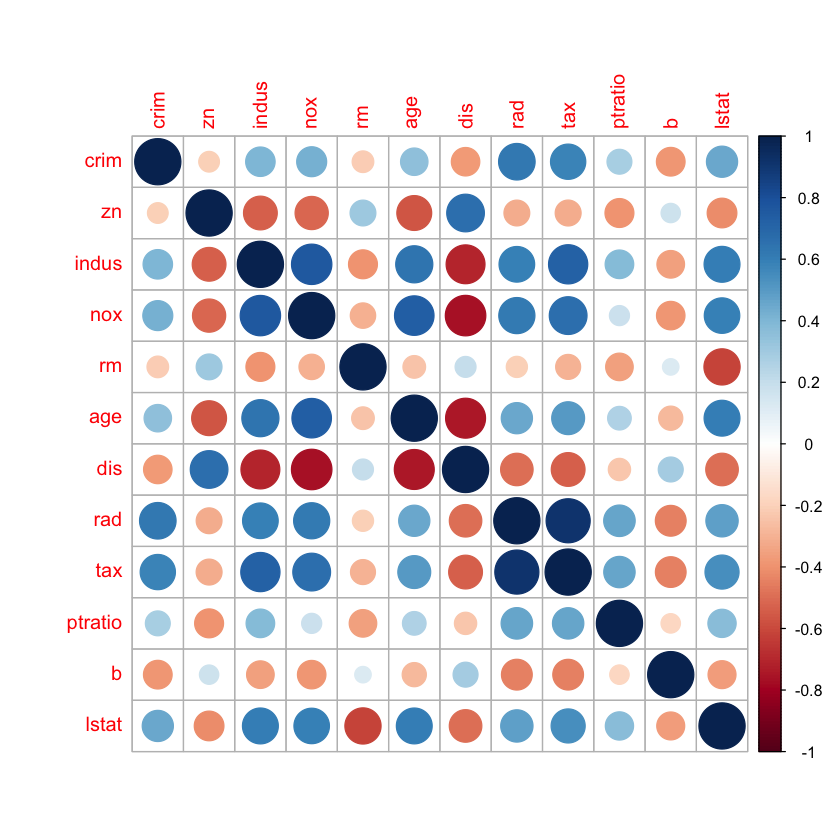

In [3]:
#(1) Tackle multi-collineraity, i.e. presence of highly correlated
#predictors (X)
#we remove numerical Xs with correlation>0.7

#Dropping response variable (Y) for calculating Multicollinearity
mat_a = subset(BostonHousing, select = -c(medv))

# we only want numerical variables for computing correlation
numeric <- mat_a[sapply(mat_a, is.numeric)]

#Calculating Correlation- strength of association between two variables
descrCor <- cor(numeric)
print(descrCor)

corrplot(descrCor)

In [4]:
#remove highly correlated variables
# if x1 and x2 are highly correlated,which one to remove depends on 
#your own understanding of the data
require(caret)
# Checking Variables that are highly correlated
highlyCorrelated = findCorrelation(descrCor, cutoff=0.7)

#Identifying Variable Names of Highly Correlated Variables
highlyCorCol = colnames(numeric)[highlyCorrelated]
highlyCorCol

[1] "indus" "tax"   "nox"   "dis"

In [5]:
#Remove highly correlated variables from the original dataset and create a new dataset

data3 = BostonHousing[, -which(colnames(BostonHousing) %in% highlyCorCol)]
dim(data3)

names(data3)

[1] 506  10

[1] "crim"    "zn"      "chas"    "rm"      "age"     "rad"     "ptratio"
 [8] "b"       "lstat"   "medv"

In [6]:
##########vif

# Choose a VIF cutoff under which a variable is retained (Zuur et al. 2010 
# vif>10  multi-collinearity
#can also reject predictors with vf 5-10
#car package

fit=lm(medv~.,data=BostonHousing)
summary(fit)




Call:
lm(formula = medv ~ ., data = BostonHousing)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas1        2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
b            9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. co

In [7]:
vif(fit) 


crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio        b    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

In [8]:
##check

df=cbind(BostonHousing$medv,data3)
df=as.data.frame(df)
fit2=lm(medv~.,data=df)
vif(fit2)

Warning message in summary.lm(object, ...):
"essentially perfect fit: summary may be unreliable"


`BostonHousing$medv`                 crim                   zn 
            3.341258             1.779546             1.684693 
                chas                   rm                  age 
            1.072699             2.223984             2.215006 
                 rad              ptratio                    b 
            2.280520             1.693953             1.367972 
               lstat 
            3.502775